In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

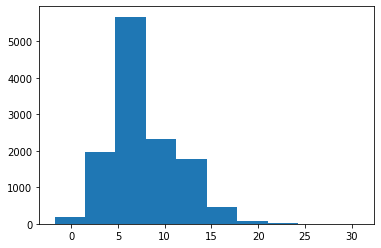

In [4]:
data = np.loadtxt("../resources/characterizing/original/dataset.txt")
plt.hist(data);

In [14]:
def get_mean(xs): # don't do this, it's a waste of time
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)

In [16]:
get_mean(data.tolist()) # waste o time

7.68805056000003

In [17]:
np.mean(data) # easy way

7.68805056

In [18]:
np.median(data)

6.7325

In [19]:
st.mode(data)

ModeResult(mode=array([5.519]), count=array([9]))

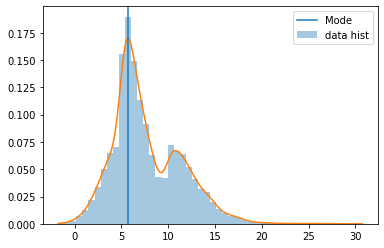

In [93]:
# mode is a silly measure as it's sensitive to resolution of your data. But if you're looking for the most frequent value (like the peak of the histogram), you can do a kde (which gives some smoothing and elliminates aliasing issues)
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
kdemode = xvals[yvals.argmax()]
sns.distplot(data, kde=False, label="data hist", norm_hist=True)
sns.lineplot(xvals, yvals)
# plt.hist(data, bins=100, density=True, label="data hist", histtype="step")
# plt.plot(xvals, yvals, label="KDE of the data")
plt.axvline(kdemode, label = "Mode")
plt.legend();

In [23]:
variance = np.var(data, ddof=1) # ddof is delta degrees of freedom, set it to 1 for sample variance, 0 for population variance

In [24]:
variance

13.137626632694301

In [25]:
stdev = np.std(data, ddof=1)

In [26]:
stdev

3.624586408501569

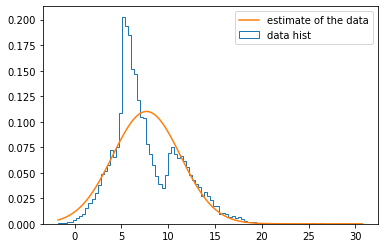

In [35]:
xVals = np.linspace(data.min(), data.max(), 1000)
yVals = st.norm.pdf(xVals, loc=data.mean(), scale=stdev)
plt.hist(data, bins=100, density=True, label="data hist", histtype="step")
plt.plot(xVals, yVals, label="estimate of the data")
plt.legend();

In [33]:
skewness = st.skew(data)

In [34]:
skewness

0.7408773663373577

In [36]:
# skewness is measure of asymentry of distribution
# first moment is 0
# second moment is stdev
# 3rd moment is skew
# 4th moment is kurtosis

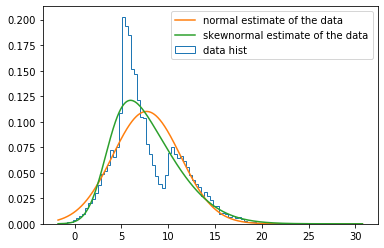

In [53]:
xVals = np.linspace(data.min(), data.max(), 1000)
yVals = st.norm.pdf(xVals, loc=data.mean(), scale=stdev)
xsVals = xVals
ps = st.skewnorm.fit(data) # have to do this since the skewed mean is different than the naive mean, so if you just plug in the skew into the naive estimate it will end up off
ysVals = st.skewnorm.pdf(xsVals, *ps) # have to pass in *ps instead of ps because ps is a tuple and just want to pass in 3 floating point values
plt.hist(data, bins=100, density=True, label="data hist", histtype="step")
plt.plot(xVals, yVals, label="normal estimate of the data")
plt.plot(xsVals, ysVals, label="skewnormal estimate of the data")
plt.legend();

In [52]:
ps

(3.3598846568555194, 3.456891940892803, 5.5712880379402225)

In [54]:
kurt = st.kurtosis(data) # by default it sets fisher = true, which gives kurtosis with respect to a normal distribution. kurtosis of a normal distribution is normally 3, so by default it just subtracts 3 from the kurtosis

In [55]:
kurt

0.5517538497309498

In [57]:
# scipy doesnn't have a function to generate a random distrubiton from kurtosis :(

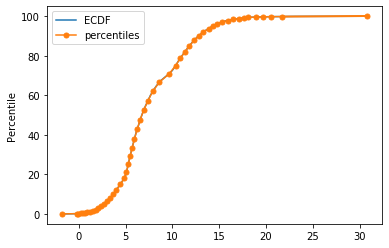

In [129]:
# ps = np.linspace (0,100,50) # linear spacing of points
ps = 100*st.norm.cdf(np.linspace(-3,3,50)) #lognormal spacing of points
ps = np.insert(ps,0,0) # so that lognormal doesn't end at 3 sigma
ps = np.insert(ps,-1,100) # so that lognormal doesn't end at -3 sigma
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0,1,len(data))

plt.plot(xs, ys*100, label="ECDF")
plt.plot(x_p, ps, label="percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

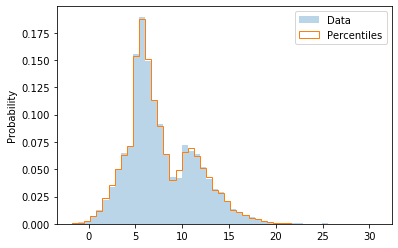

In [130]:
# let's say you want to reconstruct the distribution based on that lognormal sampling

from scipy.interpolate import interp1d

n=int(1e6)
u=np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps/100,x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha = 0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();